In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('/content/electricityConsumptionAndProductioction.csv')

In [3]:
print(data.head())
print(data.describe())
print(data.info())

              DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0  2019-01-01 00:00:00         6352        6527     1395    79           1383   
1  2019-01-01 01:00:00         6116        5701     1393    96           1112   
2  2019-01-01 02:00:00         5873        5676     1393   142           1030   
3  2019-01-01 03:00:00         5682        5603     1397   191            972   
4  2019-01-01 04:00:00         5557        5454     1393   159            960   

   Oil and Gas  Coal  Solar  Biomass  
0         1896  1744      0       30  
1         1429  1641      0       30  
2         1465  1616      0       30  
3         1455  1558      0       30  
4         1454  1458      0       30  
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.700723    1801.603149   
std     1034.961146   1005.486125    23

In [4]:
# Convert 'DateTime' to datetime data type
data['DateTime'] = pd.to_datetime(data['DateTime'])


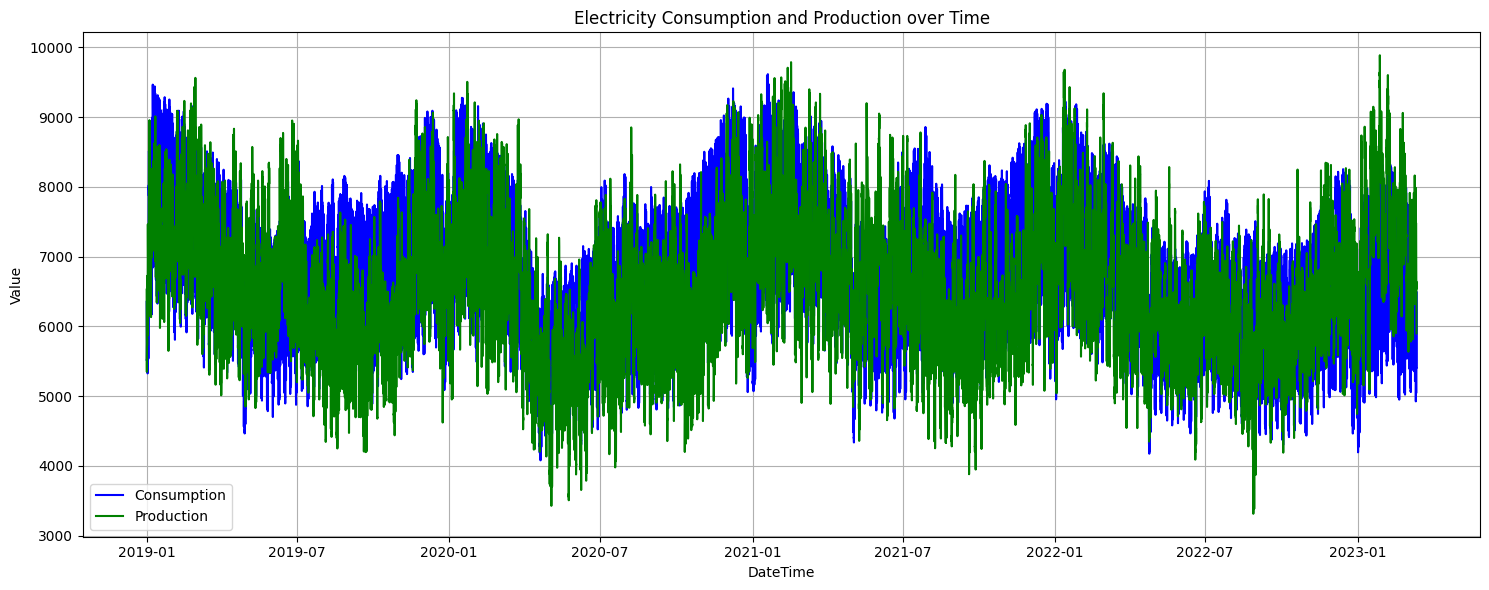

In [5]:
# Plotting Consumption and Production over time
plt.figure(figsize=(15, 6))
plt.plot(data['DateTime'], data['Consumption'], label='Consumption', color='blue')
plt.plot(data['DateTime'], data['Production'], label='Production', color='green')
plt.title('Electricity Consumption and Production over Time')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

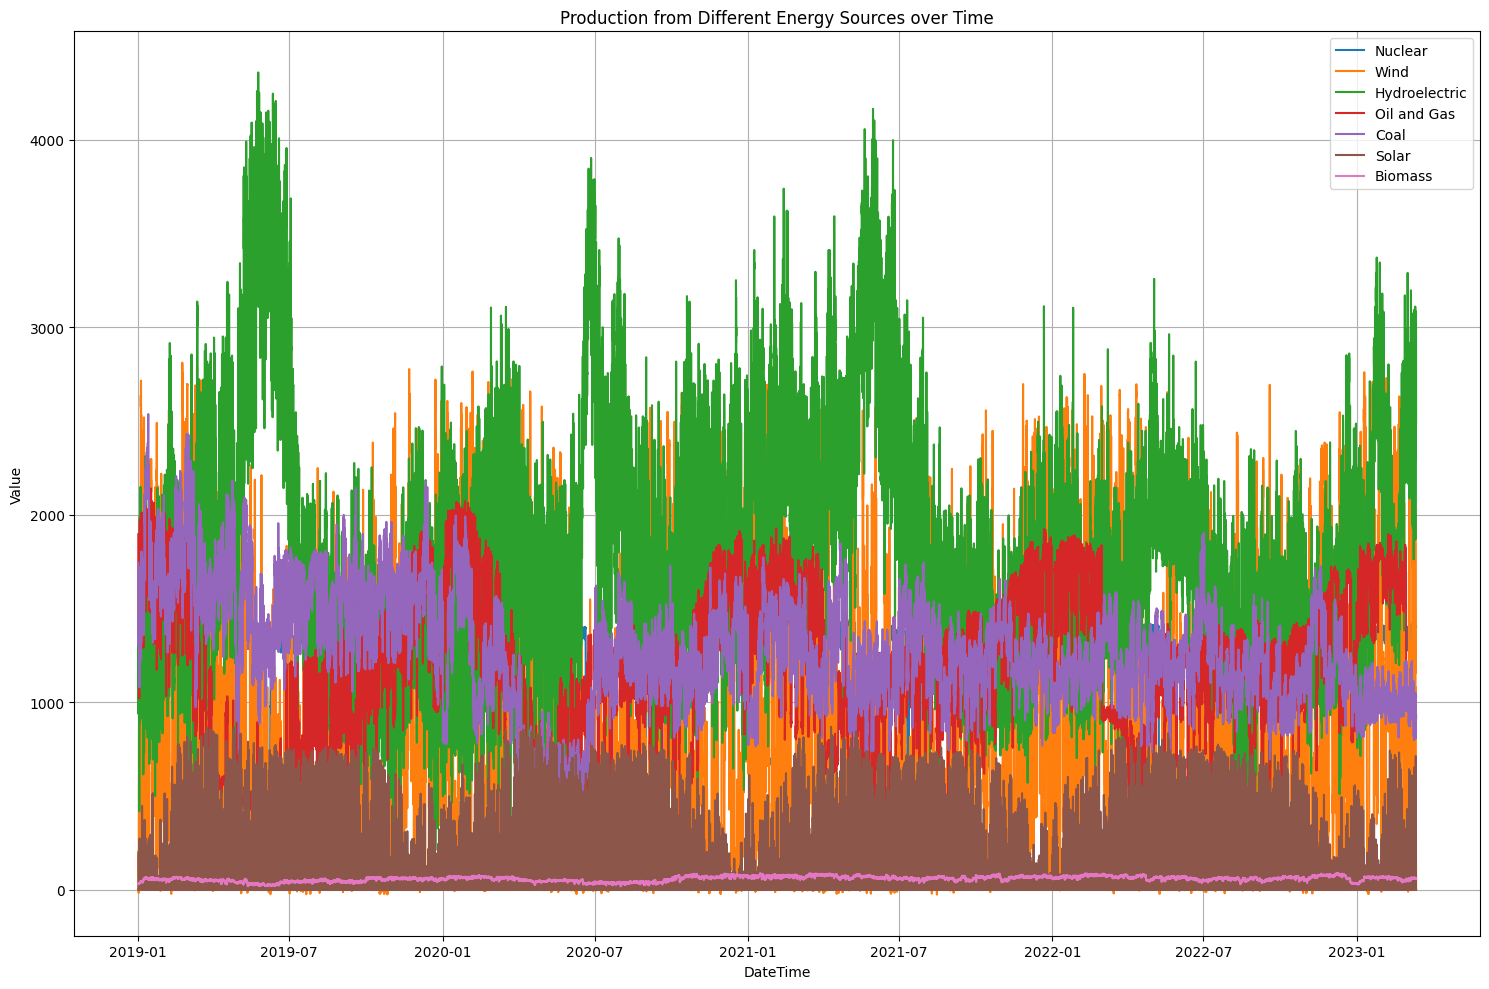

In [6]:
# Plotting production from different energy sources over time
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
plt.figure(figsize=(15, 10))
for source in energy_sources:
    plt.plot(data['DateTime'], data[source], label=source)
plt.title('Production from Different Energy Sources over Time')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

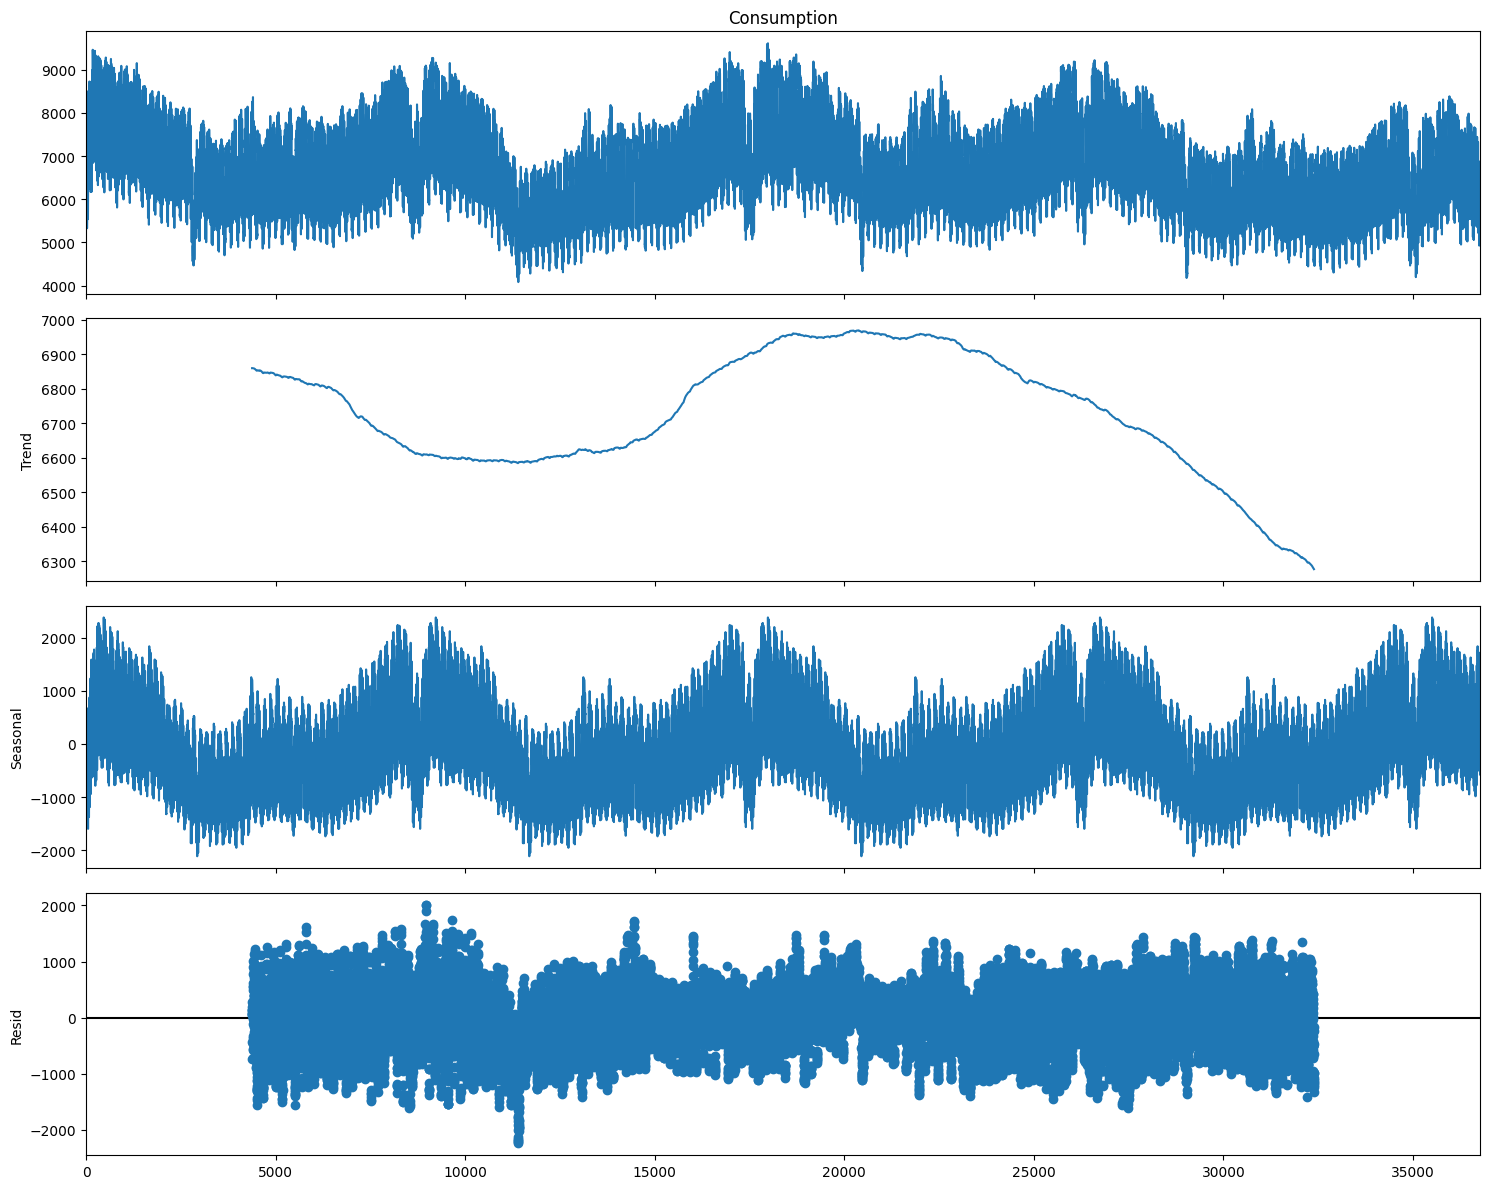

In [7]:
# Decompose the time series to understand its components
result = seasonal_decompose(data['Consumption'], model='additive', period=24*365)
fig = result.plot()
fig.set_size_inches(15, 12)
plt.tight_layout()
plt.show()

In [8]:
# Correlation Analysis
correlation_matrix = data.drop(columns=['DateTime']).corr()

<ipython-input-9-36a18bee61b3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_pattern = data.groupby('Hour').mean()[['Consumption', 'Production']]


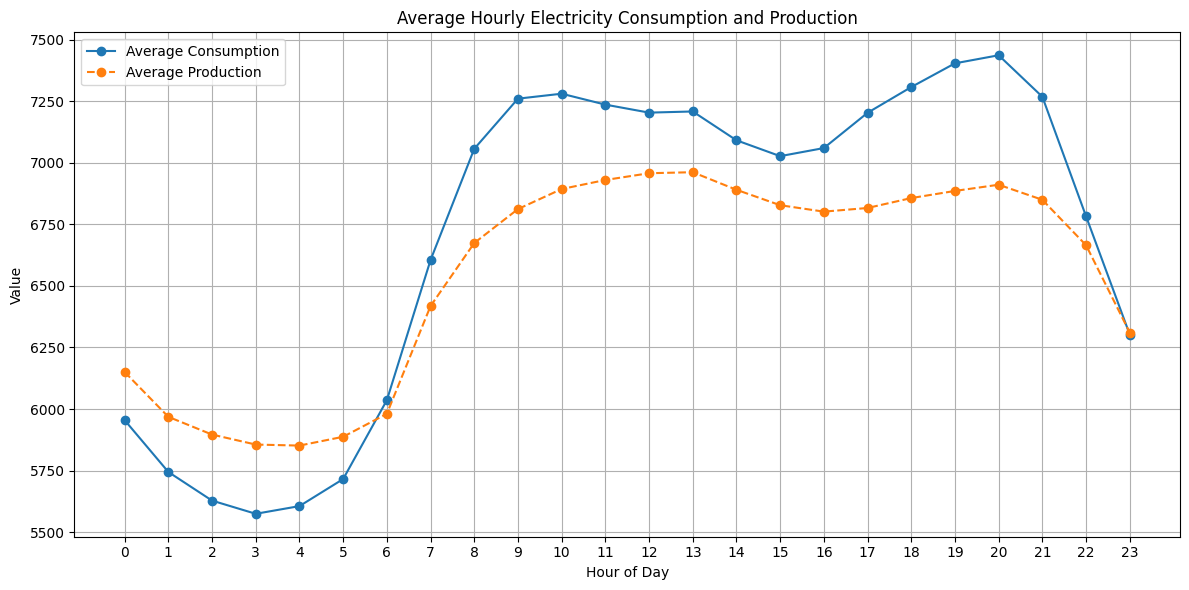

In [9]:
# Hourly Patterns Analysis
data['Hour'] = data['DateTime'].dt.hour
hourly_pattern = data.groupby('Hour').mean()[['Consumption', 'Production']]
plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern['Consumption'], label='Average Consumption', marker='o')
plt.plot(hourly_pattern['Production'], label='Average Production', marker='o', linestyle='--')
plt.title('Average Hourly Electricity Consumption and Production')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.xticks(hourly_pattern.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-10-847cb80f2398>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_pattern = data.groupby('Month').mean()[['Consumption', 'Production']]


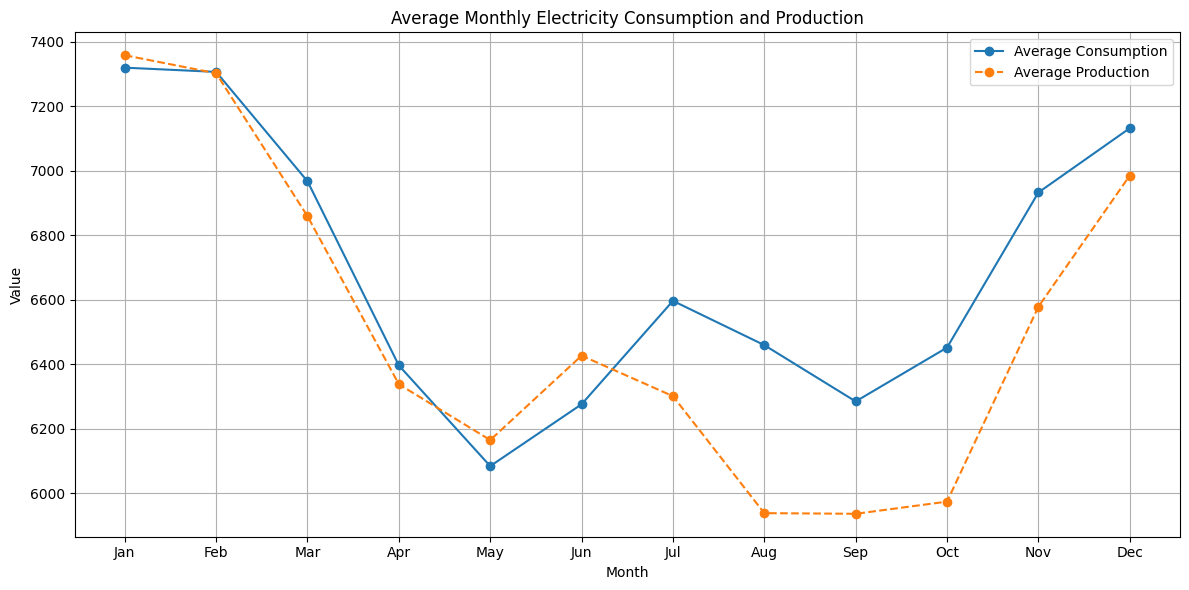

In [10]:
# Monthly Patterns Analysis
data['Month'] = data['DateTime'].dt.month
monthly_pattern = data.groupby('Month').mean()[['Consumption', 'Production']]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
plt.plot(months, monthly_pattern['Consumption'], label='Average Consumption', marker='o')
plt.plot(months, monthly_pattern['Production'], label='Average Production', marker='o', linestyle='--')
plt.title('Average Monthly Electricity Consumption and Production')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

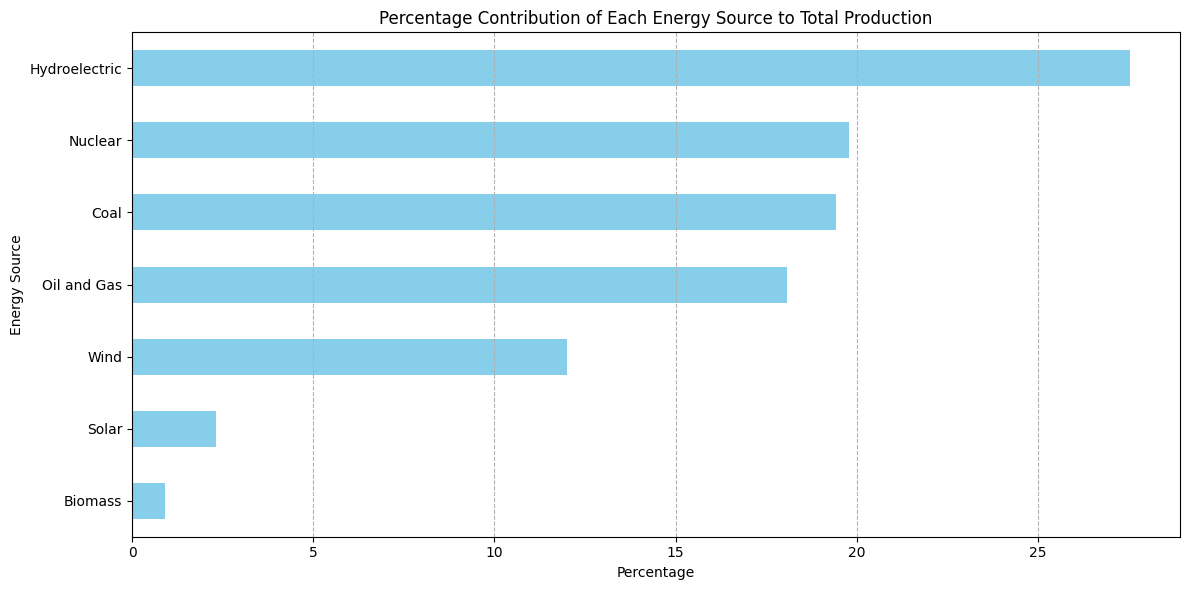

In [11]:
# Energy Source Contribution Analysis
energy_source_avg = data[energy_sources].mean()
energy_source_percentage = (energy_source_avg / energy_source_avg.sum()) * 100
plt.figure(figsize=(12, 6))
energy_source_percentage.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage Contribution of Each Energy Source to Total Production')
plt.xlabel('Percentage')
plt.ylabel('Energy Source')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

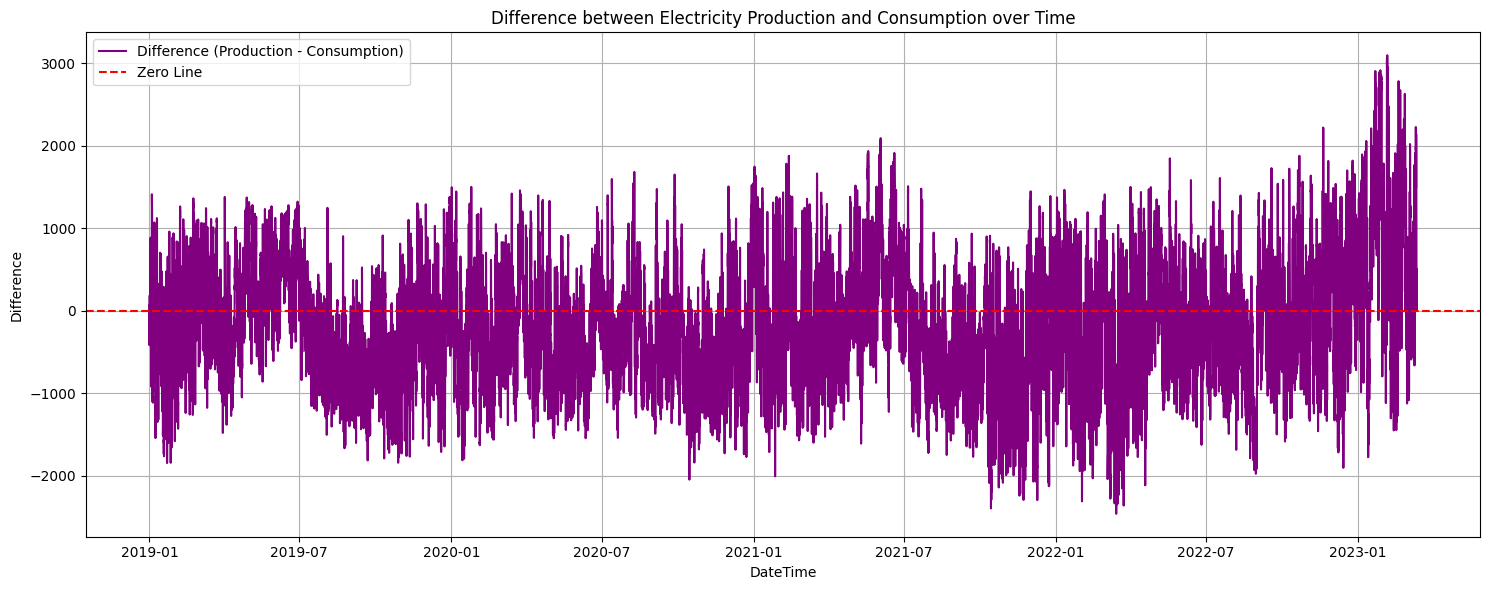

In [12]:
# Excess/Shortage Analysis
data['Difference'] = data['Production'] - data['Consumption']
plt.figure(figsize=(15, 6))
plt.plot(data['DateTime'], data['Difference'], color='purple', label='Difference (Production - Consumption)')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Difference between Electricity Production and Consumption over Time')
plt.xlabel('DateTime')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()